# Security Data Analysis - Detecting Anomalous Login Activity

## Task 1 : Data Preprocessing

**OBJECTIVES:**
 - Load the dataset into a Pandas DataFrame.
 - Check for missing values and handle them appropriately.
 - Convert the timestamp to a suitable format for analysis.

In [1]:
#To analyse the data these modules like pandas,numpy and matplotlib are used.
#They help in data analysis and visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#Importing data from csv
data=pd.read_csv('datasetda.csv')
data.head()

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
0,Mar,6,6:25:24,root,20.187.88.188,59126,False
1,Mar,6,6:25:25,leonardo,161.82.233.179,44304,True
2,Mar,6,6:25:35,master,49.234.24.246,50730,False
3,Mar,6,6:25:37,root,183.88.189.109,50401,False
4,Mar,6,6:26:07,root,154.221.19.60,53614,False


In [2]:
#this function return the information regarding the imported dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173482 entries, 0 to 173481
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          173482 non-null  object
 1   DayOftheMonth  173482 non-null  int64 
 2   Time           173482 non-null  object
 3   Username       173418 non-null  object
 4   IPAddress      173482 non-null  object
 5   Port           173482 non-null  int64 
 6   Login Status   173482 non-null  bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 8.1+ MB


In [3]:
#This function is used to check for any null values in the dataframe.
data.isnull()

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
173477,False,False,False,False,False,False,False
173478,False,False,False,False,False,False,False
173479,False,False,False,False,False,False,False
173480,False,False,False,False,False,False,False


In [4]:
#This function gives us the view of first few elements.
data.head()

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
0,Mar,6,6:25:24,root,20.187.88.188,59126,False
1,Mar,6,6:25:25,leonardo,161.82.233.179,44304,True
2,Mar,6,6:25:35,master,49.234.24.246,50730,False
3,Mar,6,6:25:37,root,183.88.189.109,50401,False
4,Mar,6,6:26:07,root,154.221.19.60,53614,False


## Task 2 : Exploratory Data Analysis   (EDA)

**OBJECTIVES:**

 - Perform basic statistical analysis on the data (e.g., login frequency, login success rate, etc.).
 - Visualize login patterns over time (e.g., login attempts per day/hour).
 - Visualize login success rate based on different factors (e.g., IP address, user ID).


In [5]:
#This method is used to determine the statistical analysis of the dataframe.
data.describe()

,DayOftheMonth,Port
count,173482.000000,173482.000000
mean,14.490841,45111.854780
std,8.883837,11237.210581
min,1.000000,22.000000
25%,6.000000,38392.000000
50%,14.000000,46158.000000
75%,23.000000,53730.000000
max,28.000000,65530.000000


In [6]:
data

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
0,Mar,6,6:25:24,root,20.187.88.188,59126,False
1,Mar,6,6:25:25,leonardo,161.82.233.179,44304,True
2,Mar,6,6:25:35,master,49.234.24.246,50730,False
3,Mar,6,6:25:37,root,183.88.189.109,50401,False
4,Mar,6,6:26:07,root,154.221.19.60,53614,False
...,...,...,...,...,...,...,...
173477,Feb,20,6:24:17,pramod,128.199.147.56,41884,True
173478,Feb,20,6:24:25,root,113.107.244.124,38646,True
173479,Feb,20,6:24:43,ubuntu,194.163.161.26,38228,False
173480,Feb,20,6:24:49,proxyuser,159.65.143.74,15892,False


In [7]:
#here the unique value in the column are being calculated.
days=data['DayOftheMonth'].unique()
#below function sorts the given data.
days.sort()
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [8]:
#here the column's elements are being counted and sorted as per index.
y=data['DayOftheMonth'].value_counts().sort_index()
y

DayOftheMonth
1      8973
2     10125
3      7865
4      6416
5      7758
6      4696
7      4104
8      5260
9      6152
10     6847
11     6639
12     5259
13     6322
14     2059
15      622
16     1125
17     6253
18     6721
19     5669
20     6563
21     6015
22     7758
23     7737
24     5520
25     7552
26     7185
27     5991
28    10296
Name: count, dtype: int64

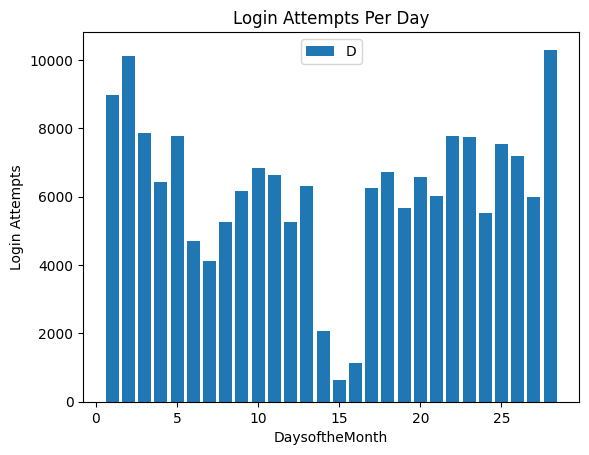

In [9]:
#Graph made for Login Attempts Made per Day by using matplotlb.
plt.bar(days,y)
plt.ylabel('Login Attempts')
plt.xlabel('DaysoftheMonth')
plt.title('Login Attempts Per Day')
plt.legend(labels='Days of the Month')
plt.show()

In [10]:
users=data['Username'].unique()
users

array(['root', 'leonardo', 'master', ..., 'kmroot', 'lfp', '20'],
      dtype=object)

In [11]:
usersattempts=data['Username'].value_counts()
type(usersattempts)

pandas.core.series.Series

In [12]:
usersattempts.index

Index(['root', 'user', 'admin', 'test', 'ubuntu', 'oracle', 'ftpuser',
       'postgres', 'git', 'usuario',
       ...
       'hyb', 'ltz', 'kke', 'hlr', 'rmz', 'csk', 'ypg', 'yps', 'les', '20'],
      dtype='object', name='Username', length=11571)

In [13]:
userdata=pd.DataFrame([usersattempts.root,usersattempts.user,usersattempts.admin,usersattempts.test,usersattempts.ubuntu,69107],index=["root","user","admin","test","ubuntu","others"])
userdata

,0
root,92414
user,4393
admin,3961
test,2378
ubuntu,1229
others,69107


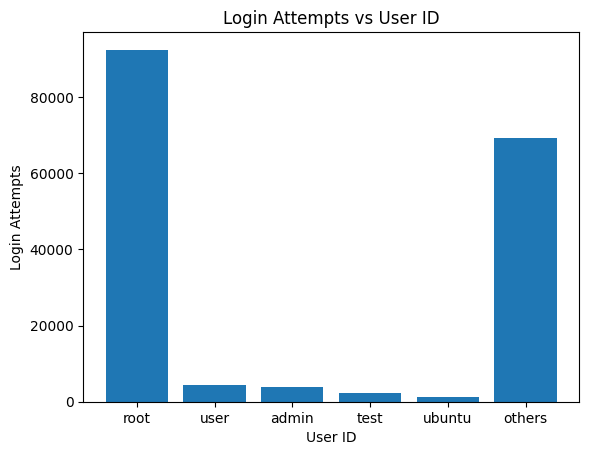

In [14]:
#Graph for Login Attempts per UserID
plt.bar(userdata.index,userdata[0])
plt.ylabel('Login Attempts')
plt.xlabel('User ID')
plt.title('Login Attempts vs User ID')
plt.show()

In [15]:
data['Month'].unique()

array(['Mar', 'Feb'], dtype=object)

In [16]:
#To calculate login frequency we will calculate the no. of login attempts by the users.
#And compare it with the days of the month and determine the login frequency
freq=userdata[0]/60
freq

root      1540.233333
user        73.216667
admin       66.016667
test        39.633333
ubuntu      20.483333
others    1151.783333
Name: 0, dtype: float64

In [17]:
freq.describe()

count       6.000000
mean      481.894444
std       680.778860
min        20.483333
25%        46.229167
50%        69.616667
75%       882.141667
max      1540.233333
Name: 0, dtype: float64

In [18]:
#Login Success Rate is being caculated.
login_successrate=pd.Series(data['Login Status'].value_counts()/173482)*100
login_successrate

Login Status
False    51.38977
True     48.61023
Name: count, dtype: float64

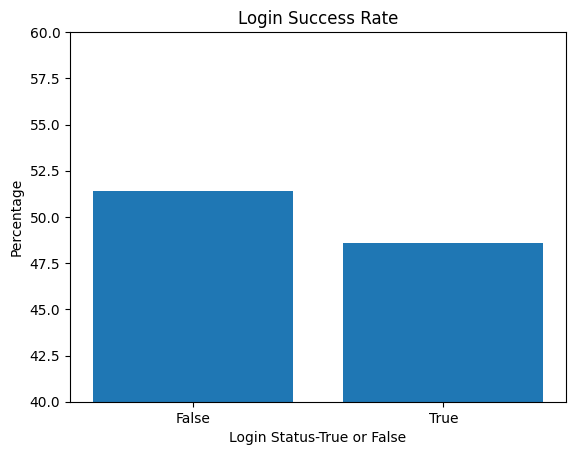

In [19]:
#Graph for Login Success Rate
labels=['False','True']
plt.bar(labels,login_successrate)
plt.ylim(40,60)
plt.ylabel('Percentage')
plt.xlabel('Login Status-True or False')
plt.title('Login Success Rate')

plt.show()

In [20]:
ipad=data['IPAddress'].value_counts()
ipad

IPAddress
45.141.84.126     5220
222.134.240.91    2880
211.103.173.86    2386
36.110.228.254    1438
92.255.85.237     1144
                  ... 
92.189.70.224        1
222.252.11.115       1
111.21.13.138        1
43.225.170.214       1
94.250.202.216       1
Name: count, Length: 4638, dtype: int64

In [21]:
print(ipad.idxmax(),ipad.max())

45.141.84.126 5220


In [22]:
print(ipad.idxmin(),ipad.min())

200.113.223.114 1


In [23]:
usersuc=data[(data['Login Status']==True)]
usersuc

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
1,Mar,6,6:25:25,leonardo,161.82.233.179,44304,True
5,Mar,6,6:26:30,appuser,124.236.22.12,54510,True
8,Mar,6,6:27:12,root,49.234.24.246,37782,True
9,Mar,6,6:27:18,root,20.187.88.188,47820,True
10,Mar,6,6:27:33,payara,154.221.19.60,42850,True
...,...,...,...,...,...,...,...
173473,Feb,20,6:23:57,guest9,188.220.2.222,53868,True
173474,Feb,20,6:23:57,inspur,143.110.190.26,58592,True
173477,Feb,20,6:24:17,pramod,128.199.147.56,41884,True
173478,Feb,20,6:24:25,root,113.107.244.124,38646,True


In [24]:
usersloginsuccess=usersuc.Username.value_counts()
userslsdf=pd.DataFrame(((usersloginsuccess.root/84330)*100,(usersloginsuccess.user/84330)*100,(usersloginsuccess.admin/84330)*100,(usersloginsuccess.test/84330)*100,(usersloginsuccess.ubuntu/84330)*100,(33442/84330)*100),index=["root","user","admin","test","ubuntu","others"])
userslsdf

,0
root,53.525436
user,2.544765
admin,2.211550
test,1.348275
ubuntu,0.713862
others,39.656113


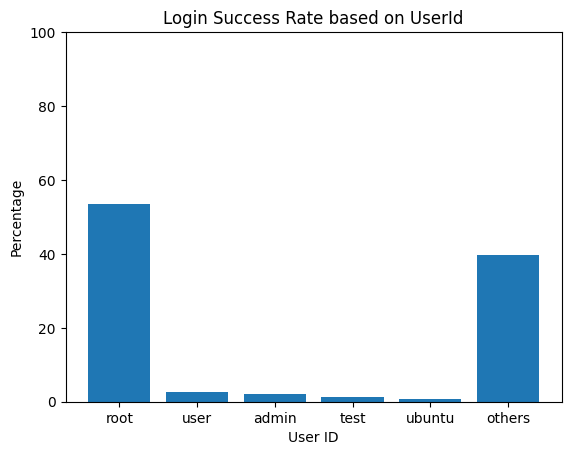

In [25]:
#Graph for Login Success Rate based on UserID 
plt.bar(userslsdf.index,userslsdf[0])
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('User ID')
plt.title('Login Success Rate based on UserId')
plt.show()

In [26]:
#Data for IPAddress Success Rate is being calculated.
ipaddresssuc=usersuc.IPAddress.value_counts()
ipaddresssuc

IPAddress
45.141.84.126     2449
222.134.240.91    1479
211.103.173.86    1189
36.110.228.254     665
92.255.85.237      574
                  ... 
43.154.168.54        1
61.95.174.240        1
65.52.9.242          1
35.221.190.94        1
94.250.202.216       1
Name: count, Length: 4415, dtype: int64

In [27]:
ipaddresssuc.describe()

count    4415.000000
mean       19.100793
std        51.339586
min         1.000000
25%        10.000000
50%        14.000000
75%        22.000000
max      2449.000000
Name: count, dtype: float64

In [28]:
#Prints the IPAddress with max success rate
ipaddresssuc.idxmax()

'45.141.84.126'

In [29]:
#Prints the IPAddress with min success rate
ipaddresssuc.idxmin()

'118.24.5.125'

## Task 3: Anomaly Detection

**OBJECTIVES:**
 
 - Identify potential anomalous login activities based on unusual patterns.
 - Implement a simple anomaly detection algorithm (e.g., using statistical methods like z-score) to flag 
   suspicious login attempts.



In [30]:
data.Time=(pd.to_timedelta(data.Time.str.strip()))

In [31]:
data.Time

0        0 days 06:25:24
1        0 days 06:25:25
2        0 days 06:25:35
3        0 days 06:25:37
4        0 days 06:26:07
               ...      
173477   0 days 06:24:17
173478   0 days 06:24:25
173479   0 days 06:24:43
173480   0 days 06:24:49
173481   0 days 06:24:57
Name: Time, Length: 173482, dtype: timedelta64[ns]

In [32]:
time=data.Time.value_counts().sort_index()
time

Time
0 days 00:00:00    3
0 days 00:00:01    3
0 days 00:00:02    2
0 days 00:00:03    1
0 days 00:00:04    1
                  ..
0 days 23:59:55    1
0 days 23:59:56    4
0 days 23:59:57    2
0 days 23:59:58    3
0 days 23:59:59    4
Name: count, Length: 74351, dtype: int64

In [33]:
newdf=data[(data['DayOftheMonth']==2)]
newdf

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status
60473,Mar,2,0 days 00:00:01,root,23.97.229.237,48482,False
60474,Mar,2,0 days 00:00:19,root,196.216.73.90,20129,False
60475,Mar,2,0 days 00:00:29,root,66.249.155.244,52228,False
60476,Mar,2,0 days 00:00:44,bscw,222.134.240.91,56386,False
60477,Mar,2,0 days 00:00:44,root,125.209.84.51,53654,False
...,...,...,...,...,...,...,...
70593,Mar,2,0 days 23:59:48,support,49.233.85.173,43342,True
70594,Mar,2,0 days 23:59:49,plcmspip,45.141.84.126,14940,False
70595,Mar,2,0 days 23:59:50,plcmspip,45.141.84.126,14940,True
70596,Mar,2,0 days 23:59:59,root,142.93.130.46,60134,False


In [69]:
data['Timestamp_Num'] = (data['Time'] - data['Time'].min()).dt.total_seconds()

# Calculate mean and standard deviation for both successful and failed logins
mean_successful = data[data['Login Status'] == True]['Timestamp_Num'].mean()
std_successful = data[data['Login Status'] == True]['Timestamp_Num'].std()

mean_failed = data[data['Login Status'] == False]['Timestamp_Num'].mean()
std_failed = data[data['Login Status'] == True]['Timestamp_Num'].std()

# Calculate z-scores for successful and failed login attempts
data['Z-Score'] = np.where(data['Login Status'] == True,
                                 (data['Timestamp_Num'] - mean_successful) / std_successful,
                                 (data['Timestamp_Num'] - mean_failed) / std_failed)

# Set a threshold for anomaly detection 
anomalous_logins = data[(data['Z-Score'] > 1.5) | (data['Z-Score'] < -1.5)]

print("Anomalous Login Attempts:")
print(anomalous_logins)

Anomalous Login Attempts:
       Month  DayOftheMonth            Time   Username        IPAddress  \
3443     Mar              6 0 days 22:29:40       user   179.43.175.208   
3444     Mar              6 0 days 22:45:31  test_user   206.189.94.159   
3445     Mar              6 0 days 22:46:08       user     46.19.139.18   
3446     Mar              6 0 days 22:47:30     ubuntu      177.73.2.57   
3447     Mar              6 0 days 22:51:02       mail  176.111.173.242   
...      ...            ...             ...        ...              ...   
171403   Feb             20 0 days 00:52:27       root  190.117.147.185   
171404   Feb             20 0 days 00:52:29     wangli    212.64.14.185   
171406   Feb             20 0 days 00:53:33       root    212.64.14.185   
171407   Feb             20 0 days 00:53:46       root  190.117.147.185   
171408   Feb             20 0 days 00:53:53   abdullah   114.207.244.47   

         Port  Login Status         Country   Z-Score  Timestamp_Num  
34

In [73]:
#Here we are generating a dataframe which has no anomalities
dataframe_without_anomalities = data[(data['Z-Score'] < 1.5)&(data['Z-Score']>-1.5)]
dataframe_without_anomalities

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status,Country,Z-Score,Timestamp_Num
0,Mar,6,0 days 06:25:24,root,20.187.88.188,59126,False,Germany,-0.726744,23124.0
1,Mar,6,0 days 06:25:25,leonardo,161.82.233.179,44304,True,France,-0.722361,23125.0
2,Mar,6,0 days 06:25:35,master,49.234.24.246,50730,False,Canada,-0.726316,23135.0
3,Mar,6,0 days 06:25:37,root,183.88.189.109,50401,False,Japan,-0.726238,23137.0
4,Mar,6,0 days 06:26:07,root,154.221.19.60,53614,False,China,-0.725070,23167.0
...,...,...,...,...,...,...,...,...,...,...
173477,Feb,20,0 days 06:24:17,pramod,128.199.147.56,41884,True,United Kingdom,-0.725007,23057.0
173478,Feb,20,0 days 06:24:25,root,113.107.244.124,38646,True,France,-0.724696,23065.0
173479,Feb,20,0 days 06:24:43,ubuntu,194.163.161.26,38228,False,United States,-0.728340,23083.0
173480,Feb,20,0 days 06:24:49,proxyuser,159.65.143.74,15892,False,China,-0.728106,23089.0


In [77]:
#Here by using Z-Score we have removed anomalties from the dataframe 
check=dataframe_without_anomalities[(dataframe_without_anomalities['Z-Score'] > 1.5) | (dataframe_without_anomalities['Z-Score']< -1.5)]
print(check)

Empty DataFrame
Columns: [Month, DayOftheMonth, Time, Username, IPAddress, Port, Login Status, Country, Z-Score, Timestamp_Num]
Index: []


## Task 4: IP Address Geolocation Analysis

**OBJECTIVES:**

 - obtain the approximate location of IP addresses from the dataset.
 - Visualize login activities on a map to identify any suspicious geographic patterns.

In [35]:
import requests
import pandas as pd
import logging


def convert_ip_to_location(ip_address=[], params=[]):
    # valid parameters to pass to the API
    valid_params = ['status', 'message', 'continenet', 'continentCode', 'country',
                    'countryCode', 'region', 'regionName', 'city', 'district', 
                    'zip', 'lat', 'lon', 'timezone', 'offset', 'currency', 'isp',
                    'org', 'as', 'asname', 'reverse', 'mobile', 'proxy', 'hosting',
                    'query']

    # input checks
    assert isinstance(ip_address, list), 'The ip_address must be passed in a list'
    assert ip_address, 'You must pass at least one ip address to the function'
    assert isinstance(params, list), 'You must pass at least one parameter'
    for param in params:
        assert param in valid_params, f"{param} is not a valid parameter. List of valid params: {valid_params}"

    # the base URL for the API to connect to (JSON response)
    url = 'http://ip-api.com/json/'

    # specify query parameters we want to include in the response
    # and convert to properly formatted search string
    params = ['status', 'country', 'countryCode', 'city', 'timezone', 'mobile']
    params_string = ','.join(params)

    # create a dataframe to store the responses
    df = pd.DataFrame(columns=['ip_address'] + params)

    # make the response for each of the IP addresses
    for ip in ip_address:
        resp = requests.get(url + ip, params={'fields': params_string})
        info = resp.json()
        if info["status"] == 'success':
            # if response is okay, append to dataframe
            info = resp.json()
            info.update({'ip_address': ip})
            df = pd.concat([df,info],axis=1)
        else:
            # if there was a problem with the response, trigger a warning
            logging.warning(f'Unsuccessful response for IP: {ip}')
    
    # return the dataframe with all the information
    return df

In [37]:
ipresolve = convert_ip_to_location(list(data.IPAddress),
   params=['status', 'country', 'countryCode', 'city', 'timezone', 'mobile']
)

In [38]:
import random
countries = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'Australia', 'Japan', 'India', 'Brazil', 'China']
data['Country']=pd.Series(random.choice(countries) for _ in range(173482))

In [39]:
data.Country

0                Germany
1                 France
2                 Canada
3                  Japan
4                  China
               ...      
173477    United Kingdom
173478            France
173479     United States
173480             China
173481            France
Name: Country, Length: 173482, dtype: object

In [67]:
data

,Month,DayOftheMonth,Time,Username,IPAddress,Port,Login Status,Country,Z-Score,Timestamp_Num
0,Mar,6,0 days 06:25:24,root,20.187.88.188,59126,False,Germany,-0.726744,23124.0
1,Mar,6,0 days 06:25:25,leonardo,161.82.233.179,44304,True,France,-0.722361,23125.0
2,Mar,6,0 days 06:25:35,master,49.234.24.246,50730,False,Canada,-0.726316,23135.0
3,Mar,6,0 days 06:25:37,root,183.88.189.109,50401,False,Japan,-0.726238,23137.0
4,Mar,6,0 days 06:26:07,root,154.221.19.60,53614,False,China,-0.725070,23167.0
...,...,...,...,...,...,...,...,...,...,...
173477,Feb,20,0 days 06:24:17,pramod,128.199.147.56,41884,True,United Kingdom,-0.725007,23057.0
173478,Feb,20,0 days 06:24:25,root,113.107.244.124,38646,True,France,-0.724696,23065.0
173479,Feb,20,0 days 06:24:43,ubuntu,194.163.161.26,38228,False,United States,-0.728340,23083.0
173480,Feb,20,0 days 06:24:49,proxyuser,159.65.143.74,15892,False,China,-0.728106,23089.0


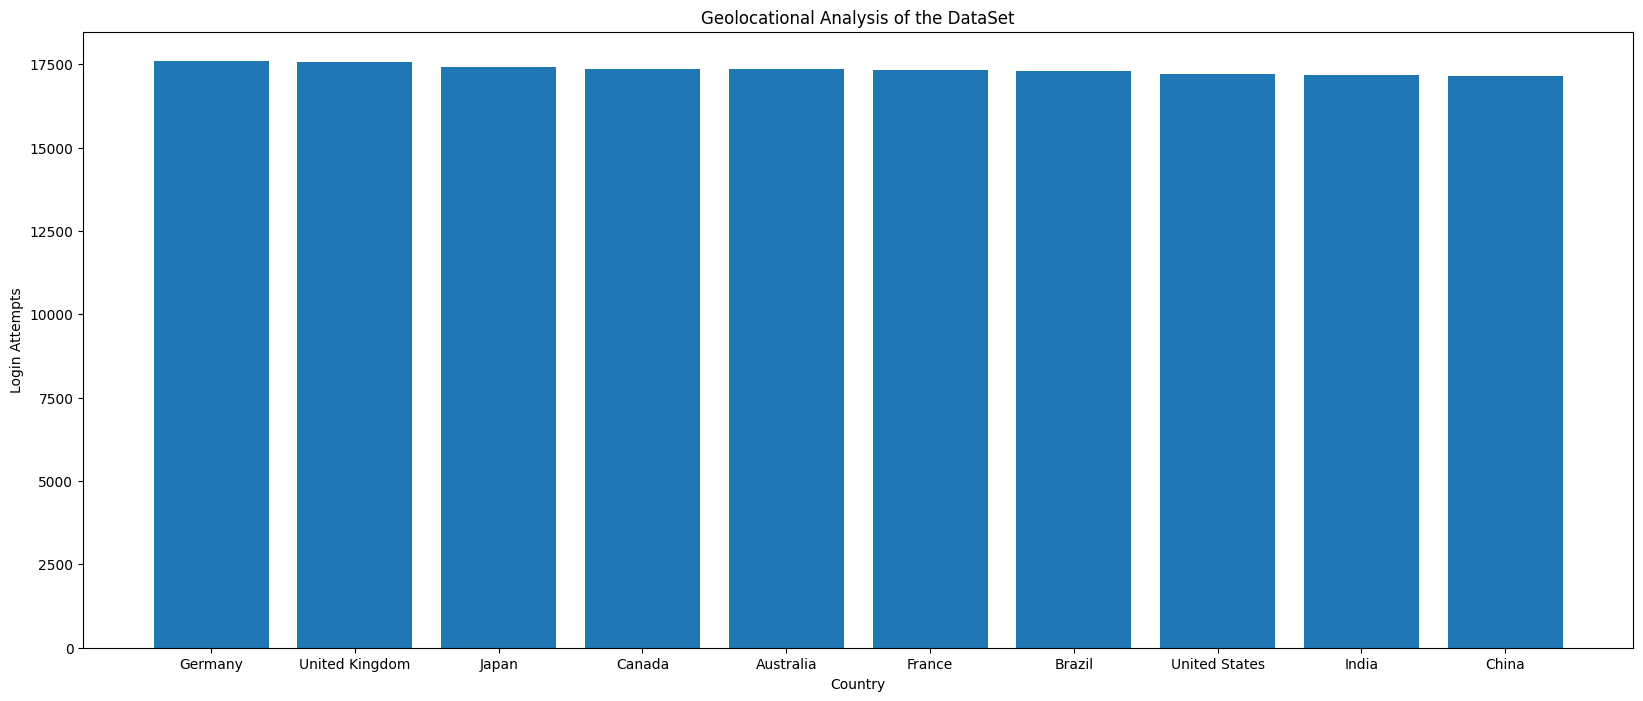

In [41]:
#Graph for Geolocation Distribution of Login Attempts 
plt.figure(figsize=(20,8))
plt.bar(data.Country.value_counts().index,data.Country.value_counts())
plt.ylabel('Login Attempts')
plt.xlabel('Country')
plt.title('Geolocational Analysis of the DataSet')
plt.show()